In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import altair as alt

In [2]:
# Load the data from the Pantheria DB
pantheria_df = pd.read_csv('../data/PanTHERIA_1-0_WR05_Aug2008.txt', sep='\t', na_values=[-999])
print(pantheria_df.columns)


Index(['MSW05_Order', 'MSW05_Family', 'MSW05_Genus', 'MSW05_Species',
       'MSW05_Binomial', '1-1_ActivityCycle', '5-1_AdultBodyMass_g',
       '8-1_AdultForearmLen_mm', '13-1_AdultHeadBodyLen_mm',
       '2-1_AgeatEyeOpening_d', '3-1_AgeatFirstBirth_d',
       '18-1_BasalMetRate_mLO2hr', '5-2_BasalMetRateMass_g', '6-1_DietBreadth',
       '7-1_DispersalAge_d', '9-1_GestationLen_d', '12-1_HabitatBreadth',
       '22-1_HomeRange_km2', '22-2_HomeRange_Indiv_km2',
       '14-1_InterbirthInterval_d', '15-1_LitterSize', '16-1_LittersPerYear',
       '17-1_MaxLongevity_m', '5-3_NeonateBodyMass_g',
       '13-2_NeonateHeadBodyLen_mm', '21-1_PopulationDensity_n/km2',
       '10-1_PopulationGrpSize', '23-1_SexualMaturityAge_d',
       '10-2_SocialGrpSize', '24-1_TeatNumber', '12-2_Terrestriality',
       '6-2_TrophicLevel', '25-1_WeaningAge_d', '5-4_WeaningBodyMass_g',
       '13-3_WeaningHeadBodyLen_mm', 'References', '5-5_AdultBodyMass_g_EXT',
       '16-2_LittersPerYear_EXT', '5-6_NeonateB

In [3]:
# Print the data for domesticate cows and pigs - notices lots of data is missing for cows.
# Should be easy enough to back-fill later.
mask = pantheria_df['MSW05_Binomial'].isin('Bos taurus,Sus scrofa'.split(','))
pantheria_df[mask].T

,25,4738
MSW05_Order,Artiodactyla,Artiodactyla
MSW05_Family,Bovidae,Suidae
MSW05_Genus,Bos,Sus
MSW05_Species,taurus,scrofa
MSW05_Binomial,Bos taurus,Sus scrofa
1-1_ActivityCycle,NaN,2
5-1_AdultBodyMass_g,618642,84471.5
8-1_AdultForearmLen_mm,NaN,NaN
13-1_AdultHeadBodyLen_mm,NaN,1349.99
2-1_AgeatEyeOpening_d,NaN,NaN


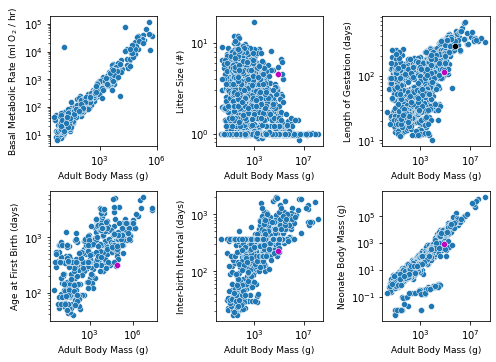

In [4]:
adult_body_mass_g_col = '5-1_AdultBodyMass_g'
gestation_len_d_col = '9-1_GestationLen_d'
litter_size_col = '15-1_LitterSize'
interbirth_interval_d_col = '14-1_InterbirthInterval_d'
age_at_first_birth_d_col = '3-1_AgeatFirstBirth_d'
neonate_body_mass_g_col = '5-3_NeonateBodyMass_g'
basal_metabolic_rate_mLO2hr_col = '18-1_BasalMetRate_mLO2hr'

descriptive_names = {
    gestation_len_d_col: 'Length of Gestation (days)',
    litter_size_col: 'Litter Size (#)', 
    interbirth_interval_d_col: 'Inter-birth Interval (days)',
    age_at_first_birth_d_col: 'Age at First Birth (days)',
    basal_metabolic_rate_mLO2hr_col: 'Basal Metabolic Rate (ml O$_2$ / hr)',
    adult_body_mass_g_col: 'Adult Body Mass (g)', 
    neonate_body_mass_g_col: 'Neonate Body Mass (g)'}

cols_of_interest = [basal_metabolic_rate_mLO2hr_col, litter_size_col,
                    gestation_len_d_col, 
                    age_at_first_birth_d_col,
                    interbirth_interval_d_col,
                    neonate_body_mass_g_col]
pairs_of_interest = [(adult_body_mass_g_col, c) for c in cols_of_interest]


fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(7,5))
flat_axs = axs.flatten()

for my_ax, (xcol, ycol) in zip(flat_axs, pairs_of_interest):
    plt.sca(my_ax)
    mask = np.logical_and(pantheria_df[xcol] > 0,
                          pantheria_df[ycol] > 0)
    sub_df = pantheria_df[mask]
    
    cow_mask = sub_df['MSW05_Binomial'] == 'Bos taurus'
    pig_mask = sub_df['MSW05_Binomial'] == 'Sus scrofa'
    
    cow_data = sub_df[cow_mask]
    pig_data = sub_df[pig_mask]
    
    plt.xscale('log')
    plt.yscale('log')
    sns.scatterplot(data=sub_df, x=xcol, y=ycol)
    sns.scatterplot(data=cow_data, x=xcol, y=ycol, color='k')
    sns.scatterplot(data=pig_data, x=xcol, y=ycol, color='m')
    
    plt.xlabel(descriptive_names[xcol], fontsize=9)
    plt.ylabel(descriptive_names[ycol], fontsize=9)
    
plt.tight_layout()
plt.savefig('../figures/pantheria_allometric_scalings.png', dpi=600, facecolor='w')
plt.show()

In [5]:
mask = np.logical_and(pantheria_df[adult_body_mass_g_col] > 0, 
                      pantheria_df[litter_size_col] > 0)
mask = np.logical_and(mask, pantheria_df[neonate_body_mass_g_col] > 0)


sub_df = pantheria_df[mask]

selection = alt.selection_multi(fields=['MSW05_Order'], bind='legend')

chart = alt.Chart(sub_df).mark_point().encode(
    alt.X(adult_body_mass_g_col, scale=alt.Scale(type='log')),
    color=alt.condition(selection, 'MSW05_Order', alt.value('lightgray'))
).properties(width=200, height=200).add_selection(selection)

alt.vconcat(alt.hconcat(
                chart.encode(alt.Y(basal_metabolic_rate_mLO2hr_col, scale=alt.Scale(type='log'))), 
                chart.encode(alt.Y(litter_size_col, scale=alt.Scale(type='log'))), 
                chart.encode(alt.Y(gestation_len_d_col, scale=alt.Scale(type='log')))),
            alt.hconcat(
                chart.encode(alt.Y(age_at_first_birth_d_col, scale=alt.Scale(type='log'))), 
                chart.encode(alt.Y(interbirth_interval_d_col, scale=alt.Scale(type='log'))), 
                chart.encode(alt.Y(neonate_body_mass_g_col, scale=alt.Scale(type='log')))))

alt.VConcatChart(...)